
# Préparation du TP2
---

Vous allez faire un script `noms_binones_Gpe_A_TP2_1.m` programme qui :
- calcule la convolution de deux signaux ;
- affiche cette convolution

Pour vérifier s'il n'y a pas d'erreurs dans ce programme, vous allez comparer les résultats approchés numériquement par octave **aux calculs que vous aurez faits à l'avance** qui constitueront une **partie du compte-rendu papier à produire**



## Calcul de la convolution (Partie 1 du sujet de TP2)

Vous avez deux convolutions à caluler dans [TP2 moodle](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24778)
 - $x_1\star x_3$  avec $x_1=\Pi_{[0, 2]}$ et $x_3 = 2 \Pi_{[1, 2]}$
 - $x_1\star x_2$  avec $x_1=\Pi_{[0, 2]}$ et $x_2 = 2 \delta_1$

Ces convolutions sont très facile à calculer si on pense qu'une convolution est le calcul de la sortie d'un système.
Voir l'explication de [TD CONV1](../td/CONV1.ipynb) et la convolution $x_1\star x_3$ est traitée dans [l'exercice 3 des convolutions](../td/S10_convolution_et_rip.ipynb).

Vous trouverez à la fin du notebook [l'exercice 3 en calcul direct](../td/S10_convolution_et_rip.ipynb#Exercice-3-calculs) avec une [animation de ce produit de convolution](https://www.desmos.com/calculator/crv0h3r5dx)! 





## Corrigé avec les fonctions anonymes

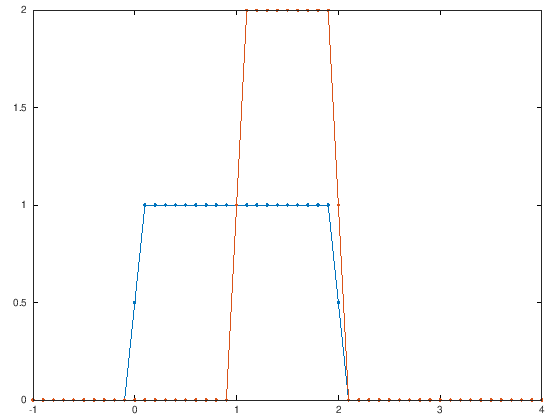

In [71]:
clear all;

eps=0.01;
u = @(t) (t>eps) +0.5*(abs(t)<=eps) ; % on veut pour symétrie u(0)=0.5
porte = @(t,a,b) u(t-a)-u(t-b);
x1 = @(t) porte(t,0,2);
x3 = @(t) 2*porte(t,1,2);

Te=0.1;
t=-1:Te:4;
plot(t,x1(t),'.-',t,x3(t),'.-')

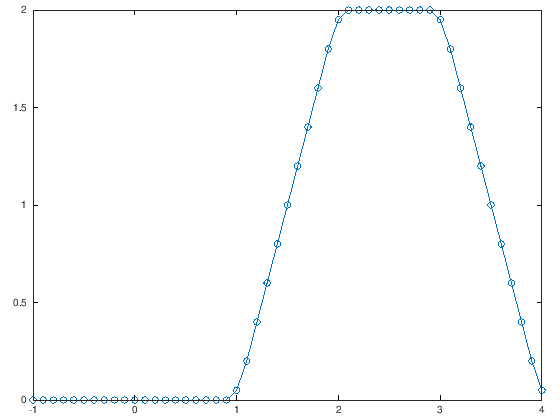

In [72]:
y = @(x) 0;

%% matlab va redéfinir y à chaque boucle pour calculer la somme de l'intégrale
% avec y = y + ... mais là ce sont des fonctions qui s'ajoutent !
for tau=t
    y = @(x) (y(x) + x1(tau)*x3(x-tau)*Te);
end
plot(t,y(t),'o-')

## Corrigé avec les tableaux

Là nous n'avons plus les fonctions mais le tableau des $x_1(t)$ (les valeurs non représentées sont forcément nulles. La fonction $x_1$ est donc remplacée par son tableau de valeur `Tx1 = x1(t)`

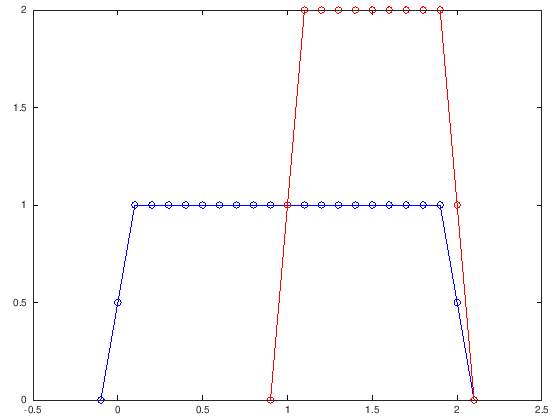

In [73]:
t1m=0-Te; %t1 min -> avant c'esty forcément nul
t1M=2+Te; %t1 Max -> après c'est forcément nul
t1=t1m:Te:t1M; % le vecteur du temps de x1
Tx1=x1(t1); % le tableau des valeurs de x1 possiblement non nulles. 
N1=length(t1); % le nombre de points de Tx1

t3m=1-Te;
t3M=2+Te;
t3=t3m:Te:t3M;
N3=length(t3);
Tx3=x3(t3);

plot(t1,Tx1,'b-o',t3,Tx3,'r-o')

Elapsed time is 0.015125 seconds.


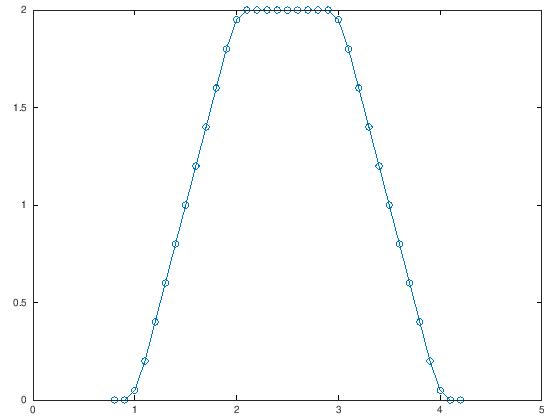

In [88]:
L=N1+N3-1 ; %nombre de points de la sortie pas forcément nuls 
tic
Ty = zeros(1,L); % tableau des y : la convolution

% On ajoute des retards de x3 pour chaque valeur de x1 à chaque instant tau de x1
% l'instant tau est repéré par l'indice j d'un tableau
% j=1 -> première valeur de x1 -> t=t1_min
% j=N1 -> dernière valeur de x1 -> t=t1 max
for j=1:N1
    % On ajoute une réponse x3 d'amplitude x1(tau) retardée d'un temps tau
    % la tranche j:(j+L3-1) correspond aux instants [tau, tau+longueur de x3] de y
    Ty(j:(j+N3-1)) = Ty(j:(j+N3-1))   +  Tx1(j) * Tx3 * Te;
end
toc
t=(0:(L-1))*Te+t1m+t3m;
plot(t,Ty,'o-')

## Avec la fonction conv de Octave

Elapsed time is 0.00604701 seconds.


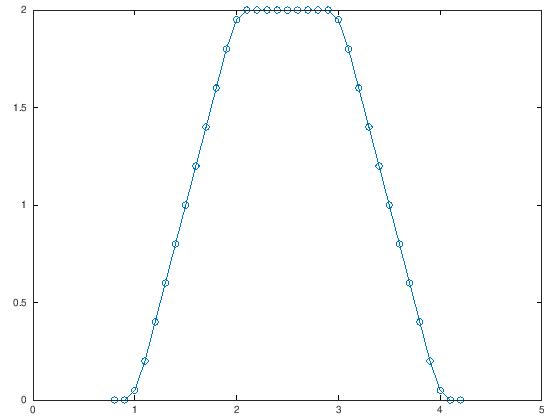

In [91]:
tic
ty = conv(Tx1,Tx3)*Te;
toc
plot(t,ty,'o-')

## Corrigé en passant par le fréquentiel 

La fonction conv de Matlab accélère les calculs en passant par le fréquentiel.
L'algo de fft (Fast Fourier Transform) calcule la transformée de Fourier discrete d'un signal avec une complexité $n \log_2(n)$.

On sait que :
 $y = x_1\star x_3 \overset{TF}{\longrightarrow} \hat{Y} = \hat{X_1}.\hat{X_3}$

Et donc :

$y = \text{TF}^{-1}\{  \hat{X_1}.\hat{X_3} \}$

Pour des signaux de longueur $n$, les calculs demandent 2 transformées et une inverse ce qui fait une complexité $3*n \log_2(n)$ rapidement plus simple que le calcul fait en temporel de complexité $n^2$.


Elapsed time is 0.00588799 seconds.


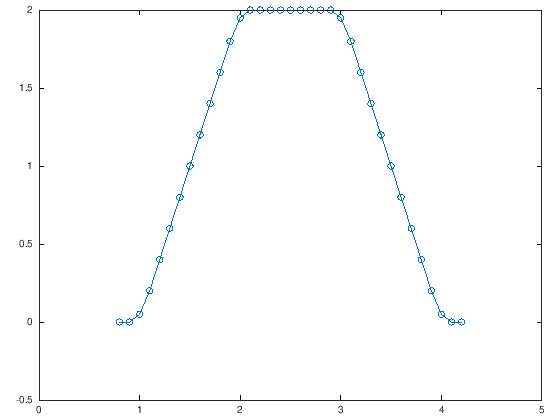

In [92]:
tic
TF_Y = fft(Tx1,L).*(fft(Tx3,L));
ty = ifft(TF_Y)*Te;
toc
plot(t,real(ty(1:L)),'o-');

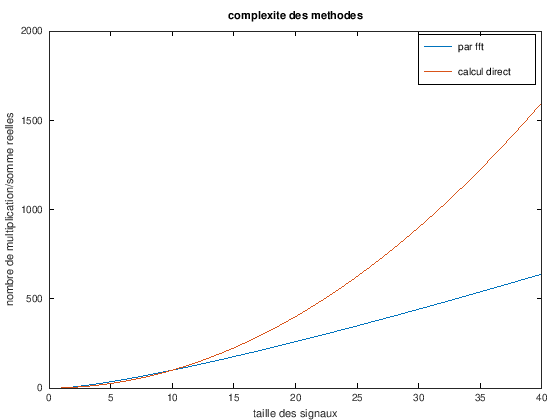

In [86]:
n=1:40;
plot(n,3*n.*log2(n),n,n.^2)
legend(["par fft";"calcul direct"])
xlabel("taille des signaux")
ylabel("nombre de multiplication/somme reelles")
title("complexite des methodes")